In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import rescomp

import matplotlib.pyplot as plt
import os

# new imports:
from rescomp.alternative_tests import simulation_tests as simt

# Conduct experiment:

In [15]:
# create the "create_sim_func" func:
def create_sim_func(parameters):
    sim = parameters["sim"]
    if sim == "modlorenz":
        sys_flag = "mod_lorenz"
    elif sim == "lorenz":
        sys_flag = "lorenz"
    def data_creation_function(time_steps, dt, starting_point):
        return rescomp.simulations.simulate_trajectory(sys_flag, dt, time_steps, starting_point)
    
    return data_creation_function
    
# create the "create_sp_func" starting point func:
def create_sp_func(parameters, Nens):
    seed = parameters["seed"]
    np.random.seed(seed)
    starting_points = np.random.randn(Nens, 3)
    return starting_points

create_sim_func_keys = ["sim"]
create_sp_func_keys = ["seed"]

# create the parameter dict to define the experiment:
parameter_dict = {
    "sim": ["lorenz", "modlorenz"],
    "seed": 100,
    
    "dt": [0.05, 0.1],
    "tau": 10,
    "T": 100, 
    
    "eps": [1e-10]
}

# define Ndims and Nens
Ndims = 1
Nens = 20

# define saving:
save = True
prepath = "simulation_results/17_01_new_testing_algo"
exp_name = "t_21_01_2022_lorenz3"

# other parameters:
get_info = True

out = simt.compare_simulations(create_sim_func, create_sp_func, create_sim_func_keys, create_sp_func_keys,
                    parameter_dict, save=save, prepath=prepath, exp_name=exp_name, Nens=Nens, Ndims=Ndims
                         , get_info=get_info)

--------------------
create_sim_func_keys ['sim']
create_sp_func_keys ['seed']
--------------------
--------------------
PARAMETERS: 
sim ['lorenz', 'modlorenz']
seed 100
dt [0.05, 0.1]
tau 10
T 100
eps 1e-10
--------------------
STARTING CALCULATIONS (4): 
....
CALC: 1/4
{'sim': 'lorenz', 'seed': 100}, dt: 0.05, tau: 10, T: 100, eps: 1e-10
N_ens: 1/20
..calculating transient..
timestep 2000/2000
N_ens: 2/20
..calculating transient..
timestep 2000/2000
N_ens: 3/20
..calculating transient..
timestep 2000/2000
N_ens: 4/20
..calculating transient..
timestep 2000/2000
N_ens: 5/20
..calculating transient..
timestep 2000/2000
N_ens: 6/20
..calculating transient..
timestep 2000/2000
N_ens: 7/20
..calculating transient..
timestep 2000/2000
N_ens: 8/20
..calculating transient..
timestep 2000/2000
N_ens: 9/20
..calculating transient..
timestep 2000/2000
N_ens: 10/20
..calculating transient..
timestep 2000/2000
N_ens: 11/20
..calculating transient..
timestep 2000/2000
N_ens: 12/20
..calculating t

# View results:

In [16]:
prepath = "simulation_results/17_01_new_testing_algo"
exp_name = "t_21_01_2022_lorenz3"

### View info file:

In [17]:
info_dict = simt.load_info_file(prepath, exp_name)
info_dict

{'Ndims': 1,
 'Nens': 20,
 'date': '21/01/2022',
 'exp_name': 't_21_01_2022_lorenz3',
 'parameter_dict': {'T': [100],
  'dt': [0.05, 0.1],
  'eps': [1e-10],
  'seed': [100],
  'sim': ['lorenz', 'modlorenz'],
  'tau': [10]},
 'time[min]': '0.981'}

### View single data file:

sim_lorenz__seed_100__dt_1p00e-01__tau_10__T_100__eps_1p00e-04__Ndims_1__Nens_2
shape of file: (1001, 1, 2)


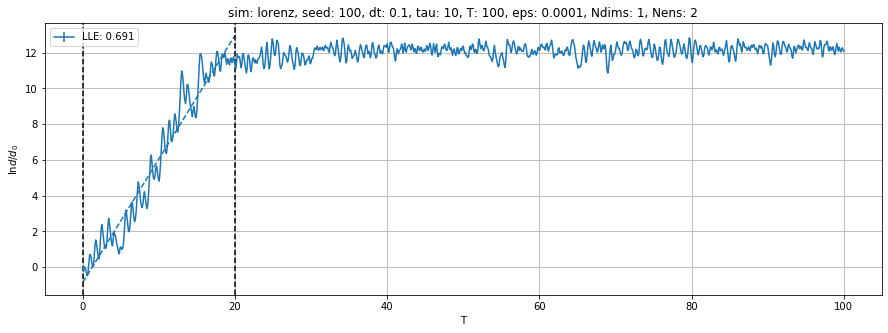

In [14]:
# plot single files: 

file_name = "sim_lorenz__seed_100__dt_1p00e-01__tau_10__T_100__eps_1p00e-04__Ndims_1__Nens_2"

plt.figure(figsize=(15, 5))
ax = plt.gca()

include_fit = 1
mean_axs = "all"
show_error = 0

dim_index = None
ens_index = None

# dim_index = [1, 2, 3, 4, 5, 3]
# ens_index = 0

t_min = 0
t_max = 20

simt.plot_div_file(ax, file_name, prepath=prepath, exp_name=exp_name, mean_axs=mean_axs, show_error=show_error,
                 rel_dist=True, include_fit=include_fit, dim_index=dim_index, ens_index=ens_index, 
                t_min=t_min, t_max=t_max)

# plt.xlim(0, 25)
ax.axvline(t_min, c="k", linestyle="--")
ax.axvline(t_max, c="k", linestyle="--")

# plt.ylim(-1, 10)

### View the whole experiment:

lines: 2, cols: 2, rows: 1


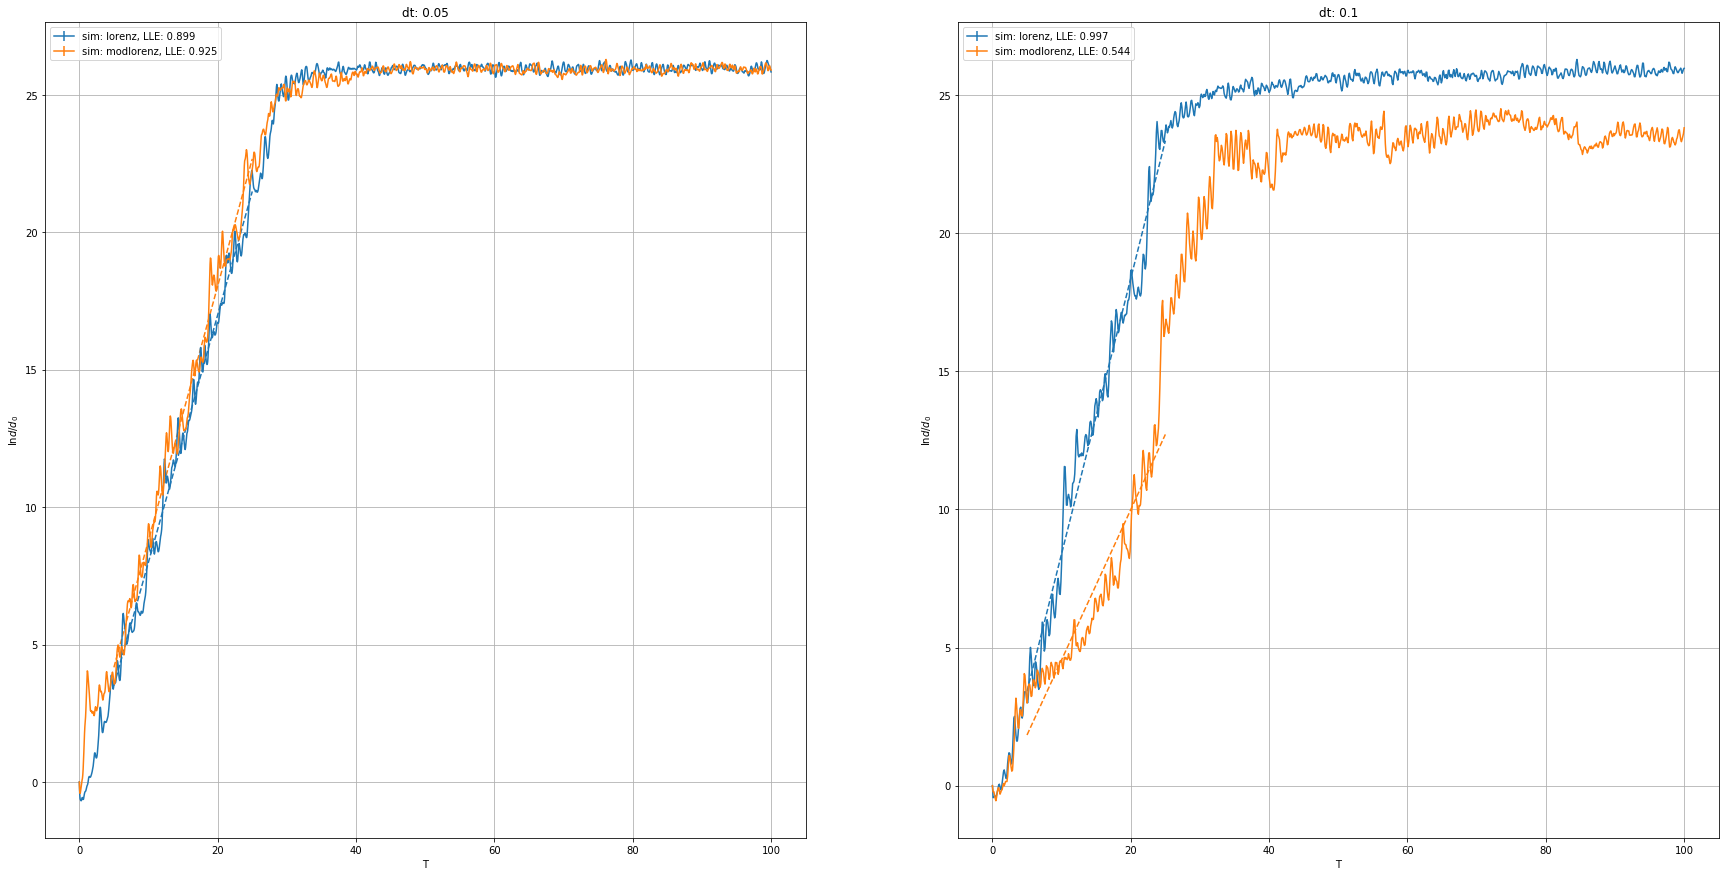

In [27]:
zs = "sim"
xs = "dt"
ys = []

# simt.plot_div_file kwargs
include_fit = 1
mean_axs = "all"
show_error = 0
dim_index = None
ens_index = None
t_min = 5
t_max = 25

subfigsize = (15, 15)
simt.plot_div_experiment(prepath, exp_name, zs, xs, ys, subfigsize=(15, 15), mean_axs=mean_axs, show_error=show_error,
                 rel_dist=True, include_fit=include_fit, dim_index=dim_index, ens_index=ens_index, 
                t_min=t_min, t_max=t_max)